## 数据包引入

In [12]:
import re
import pdfplumber
import os
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import pdfplumber
import os


## 文件路径设置

In [3]:
os.chdir('C:\\Users\\郑嘉炀\\Desktop\\金融数据分析期末作业\\2019')
#读取文件夹文件
path = 'C:\\Users\\郑嘉炀\\Desktop\\金融数据分析期末作业\\2019'
path1 = 'C:\\Users\\郑嘉炀\\Desktop\\金融数据分析期末作业\\2019txt'
files = os.listdir(path)
files1 = os.listdir(path1)

## PDF转换为txt

In [11]:
for file in files:
    print(file)
    with pdfplumber.open(file) as pdf:
        f = open(path1+'\\'+file+'.txt', 'w', encoding='utf-8')
        for page in pdf.pages:
            try:
                text = page.extract_text()
                if text != None:
                    f.write(text)
            except :
                print('error')
                pass

300214：2019年年度报告.pdf
300235：2019年年度报告.pdf
300291：2019年年度报告.pdf
300316：2019年年度报告.pdf
300363：2019年年度报告.pdf
300370：2019年年度报告.pdf
300428：2019年年度报告.pdf
300442：2019年年度报告.pdf
300451：2019年年度报告.pdf
300460：2019年年度报告.pdf
300492：2019年年度报告.pdf
300502：2019年年度报告.pdf
300504：2019年年度报告.pdf
300505：2019年年度报告.pdf
300519：2019年年度报告.pdf
300528：2019年年度报告.pdf
300538：2019年年度报告.pdf
300547：2019年年度报告.pdf
300548：2019年年度报告.pdf
300591：2019年年度报告.pdf
300612：2019年年度报告.pdf
300622：2019年年度报告.pdf
300637：2019年年度报告.pdf
300661：2019年年度报告.pdf
300670：2019年年度报告.pdf
300671：2019年年度报告.pdf
300678：2019年年度报告.pdf
300723：2019年年度报告.pdf
300755：2019年年度报告.pdf
300770：2019年年度报告.pdf
300775：2019年年度报告.pdf
300779：2019年年度报告.pdf
300789：2019年年度报告.pdf
300792：2019年年度报告.pdf
300808：2019年年度报告.pdf


## 股票基本信息检索

In [7]:
总表 = []
for file in files1:
    print(file)
    with open(path1+'\\'+file, 'r', encoding='utf-8') as f:
        data = f.read()
        f.close
        data = data.replace(' ', '')
        公司信息 = {}
        gsmc = re.search('(.*?)有限公司', data)
        公司名称 = gsmc.group(1)
        公司信息['公司名称'] = 公司名称+'有限公司'
        gpjc = re.search('股票简称：?.*?(\w\w\w\w)', data)
        股票简称 = gpjc.group(1)
        公司信息['股票简称'] = 股票简称
        gpdm = re.search('股票代码：?.*?(\w\w\w\w\w\w)', data)
        股票代码 = gpdm.group(1)
        公司信息['股票代码'] = 股票代码
        fddbr = re.search('公司的法定代表人(.*?)\n', data)
        公司的法定代表人 = fddbr.group(1)
        公司信息['公司的法定代表人'] = 公司的法定代表人
        bgdz = re.search('办公地址(.*?)\n', data)
        办公地址 = bgdz.group(1)
        公司信息['办公地址'] = 办公地址
        gswz = re.search('公司.*?网址(.*?)\n', data)
        公司网址 = gswz.group(1)
        公司信息['公司网址'] = 公司网址
        dzxx = re.search('电子信箱(.*?)\n', data)
        电子信箱 = dzxx.group(1)
        公司信息['电子信箱'] = 电子信箱
        总表.append(公司信息)
        公司信息 = {}

300214：2019年年度报告.pdf.txt
300235：2019年年度报告.pdf.txt
300291：2019年年度报告.pdf.txt
300316：2019年年度报告.pdf.txt
300363：2019年年度报告.pdf.txt
300370：2019年年度报告.pdf.txt
300428：2019年年度报告.pdf.txt
300442：2019年年度报告.pdf.txt
300451：2019年年度报告.pdf.txt
300460：2019年年度报告.pdf.txt
300492：2019年年度报告.pdf.txt
300502：2019年年度报告.pdf.txt
300504：2019年年度报告.pdf.txt
300505：2019年年度报告.pdf.txt
300519：2019年年度报告.pdf.txt
300528：2019年年度报告.pdf.txt
300538：2019年年度报告.pdf.txt
300547：2019年年度报告.pdf.txt
300548：2019年年度报告.pdf.txt
300591：2019年年度报告.pdf.txt
300612：2019年年度报告.pdf.txt
300622：2019年年度报告.pdf.txt
300637：2019年年度报告.pdf.txt
300661：2019年年度报告.pdf.txt
300670：2019年年度报告.pdf.txt
300671：2019年年度报告.pdf.txt
300678：2019年年度报告.pdf.txt
300723：2019年年度报告.pdf.txt
300755：2019年年度报告.pdf.txt
300770：2019年年度报告.pdf.txt
300775：2019年年度报告.pdf.txt
300779：2019年年度报告.pdf.txt
300789：2019年年度报告.pdf.txt
300792：2019年年度报告.pdf.txt
300808：2019年年度报告.pdf.txt


## 结果以表格形式输出

In [8]:
df = pd.DataFrame(总表)
df

公司名称  股票简称    股票代码      公司的法定代表人  \
0         山东日科化学股份有限公司  日科化学  300214           彭国锋   
1        深圳市方直科技股份有限公司  方直科技  300235           黄元忠   
2       北京华录百纳影视股份有限公司  华录百纳  300291            方刚   
3         浙江晶盛机电股份有限公司  晶盛机电  300316           曹建伟   
4       重庆博腾制药科技股份有限公司  博腾股份  300363           居年丰   
5         北京安控科技股份有限公司  安控科技  300370           许永良   
6     河北四通新型金属材料股份有限公司  四通新材  300428           臧立国   
7        上海普丽盛包装股份有限公司  普丽盛股  300442           姜卫东   
8         创业慧康科技股份有限公司  创业慧康  300451            葛航   
9       广东惠伦晶体科技股份有限公司  惠伦晶体  300460           赵积清   
10        华图山鼎设计股份有限公司  山鼎设计  300492            陈栗   
11     成都新易盛通信技术股份有限公司  新易盛股  300502           高光荣   
12      四川天邑康和通信股份有限公司  天邑股份  300504           李世宏   
13       昆明川金诺化工股份有限公司  川金诺股  300505            刘甍   
14        浙江新光药业股份有限公司  新光药业  300519           王岳钧   
15    幸福蓝海影视文化集团股份有限公司  幸福蓝海  300528           蒋小平   
16       深圳市同益实业股份有限公司  同益股份  300538           邵羽南   
17        四川川环科技股份有限公司  川环科技  300547           文谟统   
18          博创科技股份有限公司  博创科技  为60033    ZHUWEI(朱伟)   
19       广东万里马实业股份有限公司  万里马股  系公司ODM           林大耀   
20  宣亚国际营销科技（北京）股份有限公司  宣亚国际  300612            邬涛   
21        博士眼镜连锁股份有限公司  博士眼镜  300622  ALEXANDERLIU   
22       浙江扬帆新材料股份有限公司  扬帆新材  300537            樊彬   
23     圣邦微电子（北京）股份有限公司  圣邦股份  300661           张世龙   
24      江苏大烨智能电气股份有限公司  大烨智能  300670            陈杰   
25     深圳市富满电子集团股份有限公司  富满电子  300671           刘景裕   
26     中科院成都信息技术股份有限公司  中科信息  300678           史志明   
27         一品红药业股份有限公司  一品红股  300723           李捍雄   
28      华致酒行连锁管理股份有限公司  华致酒行  300755           彭宇清   
29       广东南方新媒体股份有限公司  新媒股份  300770           林瑞军   
30        西安三角防务股份有限公司  三角防务  300775           严建亚   
31      青岛惠城环保科技股份有限公司  惠城环保  300779           张新功   
32        成都唐源电气股份有限公司  唐源电气  300789            周艳   
33      杭州壹网壹创科技股份有限公司  壹网壹创  300792           林振宇   
34          广东久量股份有限公司  久量股份  300808           卓楚光   

                                         办公地址  \
0                              山东省昌乐县英轩街3999号   
1                       深圳市南山区大新路198号创新大厦B座9楼   
2                           北京市朝阳区安家楼50号院A7-2   
3                        浙江省杭州市余杭区五常街道创智一号2号楼   
4    重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
5                             北京市海淀区地锦路9号院6号楼   
6                              保定市清苑区发展西街359号   
7                            上海市金山区张堰镇金张支路84号   
8                    杭州市滨江区长河街道越达巷92号创业智慧大厦五楼   
9                           广东省东莞市黄江镇黄江东环路68号   
10                     成都市锦江区东大街芷泉段6号1栋1单元37层   
11                          成都市双流区公兴镇物联西街127号   
12                        四川省大邑县晋原镇雪山大道一段198号   
13                       云南省昆明市呈贡区上海东盟大厦A座10楼   
14                          浙江省嵊州市剡湖街道环城西路25号   
15                             南京市栖霞区元化路8号28幢   
16  广东省深圳市宝安区新安街道海旺社区N12区新湖路99号壹方中心北区三期A塔1001   
17                              四川省达州市大竹县工业园区   
18                           浙江省嘉兴市南湖区亚太路306号   
19                广州市海珠区新港东路1028号保利世界贸易中心F座3层   
20                        北京市朝阳区八里庄东里1号CN02-B   
21           深圳市罗湖区深南东路5016号京基一百大厦A座2201-02单元   
22                      浙江省杭州市滨江区信诚路31号扬帆大厦五楼   
23                    北京市海淀区西三环北路87号13层3-1301   
24                             南京市江宁区将军大道223号   
25                  深圳市福田区香蜜湖街道农园路时代科技大厦西区18楼   
26                             四川省成都市人民南路四段9号   
27               广州市天河区珠江新城金穗路星汇国际大厦西塔17层01单元   
28                   北京市东城区白桥大街15号嘉禾国信大厦CD座5层   
29                         广州市人民北路686号自编25幢后座   
30                              西安市航空基地蓝天二路8号   
31                           青岛经济技术开发区淮河东路57号   
32                   成都市武侯区武兴五路355号西部智谷A1-1-9   
33        浙江省杭州市经济技术开发区白杨街道科技园路2号2幢14层01-14单元   
34                        广州市白云区云城西路白云绿地中心27楼   

                               公司网址                         电子信箱  
0           http://www.rikechem.com        rikechem@rikechem.com  
1                www.kingsunedu.com  kingsunsoft@kingsunsoft.com  
2               http://www.hlbn.cc/               hbndsh@hlbn.cc  
3               http://www.jsjd.cc/     

## 三年营业收入 

In [4]:
公司三年营业收入 = []
for file in files1:
    print(file)
    with open(path1+'\\'+file, 'r', encoding='utf-8') as f: 
        data = f.read()
        f.close
        data = data.replace(' ', '')    
        income = re.findall(r'营业收入（元）(.*?)\n', data)        
        income = " ".join(str(i) for i in income)
        incom1 = re.findall(r'\d*\,?\d*\,?\d*\,?\d+\.?\d\d', income)
        del incom1[2]        
        gsmc = re.search('(.*?)有限公司', data)
        公司名称 = gsmc.group(1)
        incom1.insert(0,公司名称)
        公司三年营业收入.append(incom1)


300214：2019年年度报告.pdf.txt
300235：2019年年度报告.pdf.txt
300291：2019年年度报告.pdf.txt
300316：2019年年度报告.pdf.txt
300363：2019年年度报告.pdf.txt
300370：2019年年度报告.pdf.txt
300428：2019年年度报告.pdf.txt
300442：2019年年度报告.pdf.txt
300451：2019年年度报告.pdf.txt
300460：2019年年度报告.pdf.txt
300492：2019年年度报告.pdf.txt
300502：2019年年度报告.pdf.txt
300504：2019年年度报告.pdf.txt
300505：2019年年度报告.pdf.txt
300519：2019年年度报告.pdf.txt
300528：2019年年度报告.pdf.txt
300538：2019年年度报告.pdf.txt
300547：2019年年度报告.pdf.txt
300548：2019年年度报告.pdf.txt
300591：2019年年度报告.pdf.txt
300612：2019年年度报告.pdf.txt
300622：2019年年度报告.pdf.txt
300637：2019年年度报告.pdf.txt
300661：2019年年度报告.pdf.txt
300670：2019年年度报告.pdf.txt
300671：2019年年度报告.pdf.txt
300678：2019年年度报告.pdf.txt
300723：2019年年度报告.pdf.txt
300755：2019年年度报告.pdf.txt
300770：2019年年度报告.pdf.txt
300775：2019年年度报告.pdf.txt
300779：2019年年度报告.pdf.txt
300789：2019年年度报告.pdf.txt
300792：2019年年度报告.pdf.txt
300808：2019年年度报告.pdf.txt


## 表格形式输出

In [14]:
df1 = pd.DataFrame(公司三年营业收入)
df1

0                 1                 2                 3  \
0         山东日科化学股份  2,420,120,333.77  1,568,771,296.29  2,103,216,856.38   
1        深圳市方直科技股份    109,014,398.01    107,245,103.63    100,510,607.42   
2       北京华录百纳影视股份    611,431,097.94    629,521,249.35  2,247,623,728.70   
3         浙江晶盛机电股份  3,109,742,819.15  2,535,711,475.03  1,948,848,200.36   
4       重庆博腾制药科技股份  1,551,298,762.27  1,184,863,256.32  1,184,088,767.29   
5         北京安控科技股份  1,255,875,227.80  1,371,045,013.22  1,766,370,972.14   
6     河北四通新型金属材料股份  6,426,889,811.08  6,754,637,522.85  6,262,823,276.54   
7        上海普丽盛包装股份    640,060,243.46    579,549,995.56    694,225,978.93   
8         创业慧康科技股份  1,479,824,747.66  1,290,288,361.43  1,152,952,938.09   
9       广东惠伦晶体科技股份    309,942,731.09    318,987,012.27    363,278,187.71   
10        华图山鼎设计股份    213,738,816.56    215,946,744.36    149,941,000.43   
11     成都新易盛通信技术股份  1,164,873,682.36    759,950,284.50    877,365,361.78   
12      四川天邑康和通信股份  2,137,738,779.11  2,775,005,851.17  2,354,874,134.30   
13       昆明川金诺化工股份  1,125,995,638.52    965,593,161.31    799,813,584.75   
14        浙江新光药业股份    291,262,099.70    276,257,365.69    310,865,113.13   
15    幸福蓝海影视文化集团股份  2,138,087,936.10  1,654,823,836.35  1,517,230,070.94   
16       深圳市同益实业股份  1,787,353,342.15  1,295,612,052.52  1,010,108,368.74   
17        四川川环科技股份    576,570,899.55    610,366,219.73    647,774,368.00   
18          博创科技股份    407,171,642.60    275,110,934.64    349,236,707.65   
19       广东万里马实业股份    675,535,587.07    693,399,606.66    604,143,896.88   
20  宣亚国际营销科技（北京）股份    354,228,722.98    369,281,216.23    504,510,269.50   
21        博士眼镜连锁股份    655,031,758.19    566,055,654.27    471,321,887.98   
22       浙江扬帆新材料股份    511,692,670.37    525,975,255.69              2.72   
23     圣邦微电子（北京）股份    792,494,891.33    572,392,694.37             38.45   
24      江苏大烨智能电气股份    386,148,084.92    355,366,687.26    339,810,515.98   
25     深圳市富满电子集团股份    598,224,427.85    496,688,658.45    439,734,381.50   
26     中科院成都信息技术股份    364,413,271.82    344,467,451.37    290,694,326.03   
27         一品红药业股份  1,637,405,569.89  1,429,554,297.97  1,380,217,271.58   
28      华致酒行连锁管理股份  3,737,888,401.79  2,720,804,229.54  2,406,518,403.67   
29       广东南方新媒体股份    995,995,779.68    643,164,088.73    445,957,893.70   
30        西安三角防务股份    613,876,364.67    465,723,211.93    374,760,035.25   
31      青岛惠城环保科技股份    343,794,748.38    343,872,381.52    266,606,998.82   
32        成都唐源电气股份    308,757,518.33    264,614,714.55    208,126,044.69   
33      杭州壹网壹创科技股份  1,450,821,188.98  1,012,796,031.64    704,407,372.24   
34          广东久量股份    879,602,396.23    867,574,820.46    864,338,971.47   

                 4               5  
0             None            None  
1             None            None  
2             None            None  
3             None            None  
4             None            None  
5             None            None  
6             None            None  
7             None            None  
8             None            None  
9             None            None  
10            None            None  
11            None            None  
12            None            None  
13            None            None  
14            None            None  
15            None            None  
16            None            None  
17            None            None  
18            None            None  
19            None            None  
20            None            None  
21            None            None  
22  436,471,908.25  436,471,908.25  
23  531,505,272.15  531,505,272.15  
24            None            None  
25            None            None  
26            None            None  
27            None            None  
28            None            None  
29            None            None  
30            None            None  
31            None            None  
32            None            None  
33            None    

## 取前20家公司作图

['2420120333.77', '1568771296.29', '2103216856.38']
['109014398.01', '107245103.63', '100510607.42']
['611431097.94', '629521249.35', '2247623728.70']
['3109742819.15', '2535711475.03', '1948848200.36']
['1551298762.27', '1184863256.32', '1184088767.29']
['1255875227.80', '1371045013.22', '1766370972.14']
['6426889811.08', '6754637522.85', '6262823276.54']
['640060243.46', '579549995.56', '694225978.93']
['1479824747.66', '1290288361.43', '1152952938.09']
['309942731.09', '318987012.27', '363278187.71']
['213738816.56', '215946744.36', '149941000.43']
['1164873682.36', '759950284.50', '877365361.78']
['2137738779.11', '2775005851.17', '2354874134.30']
['1125995638.52', '965593161.31', '799813584.75']
['291262099.70', '276257365.69', '310865113.13']
['2138087936.10', '1654823836.35', '1517230070.94']
['1787353342.15', '1295612052.52', '1010108368.74']
['576570899.55', '610366219.73', '647774368.00']
['407171642.60', '275110934.64', '349236707.65']
['675535587.07', '693399606.66', '60414

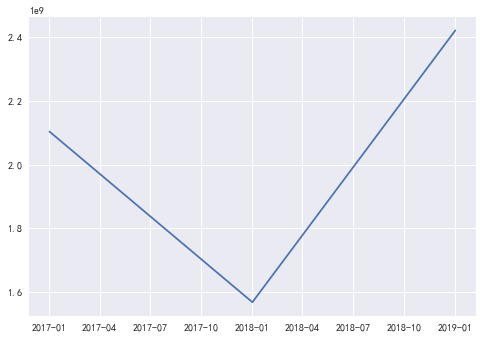

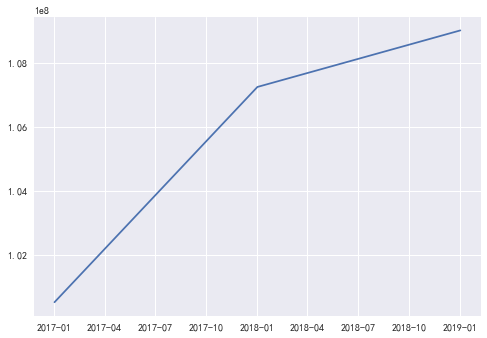

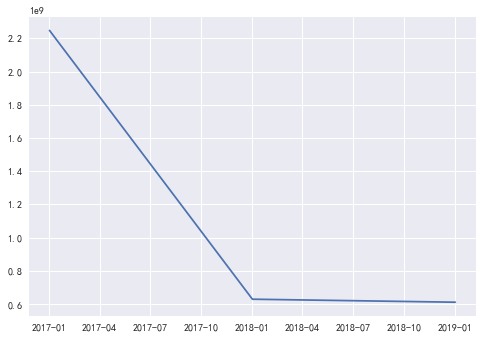

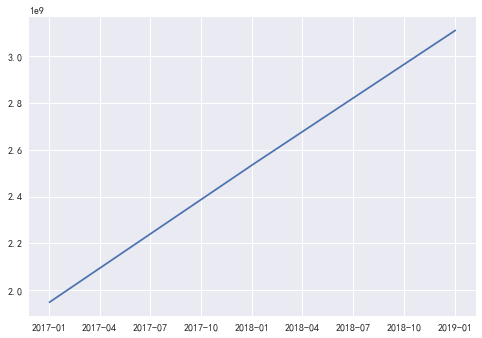

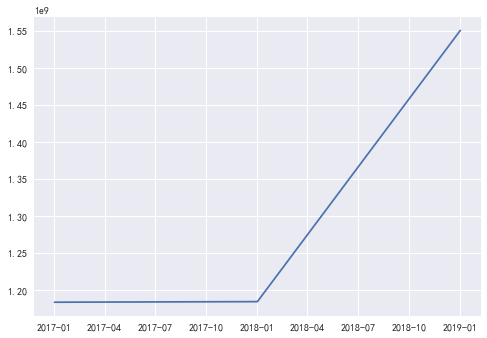

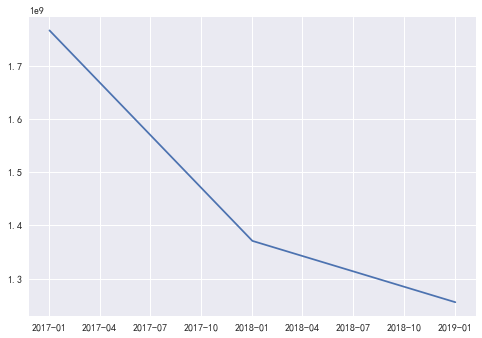

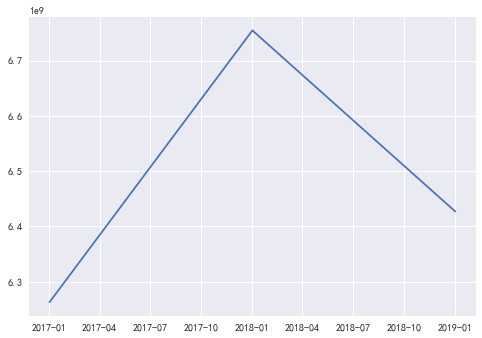

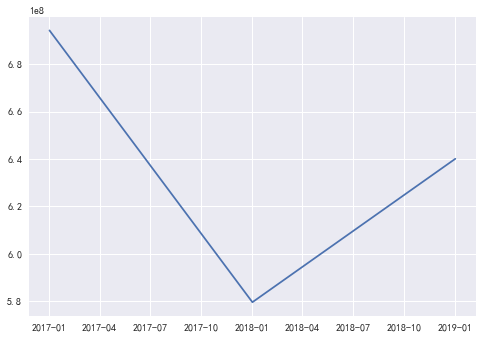

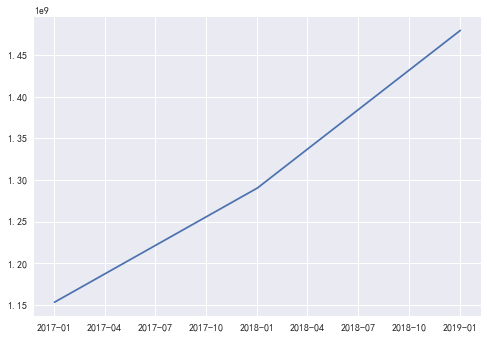

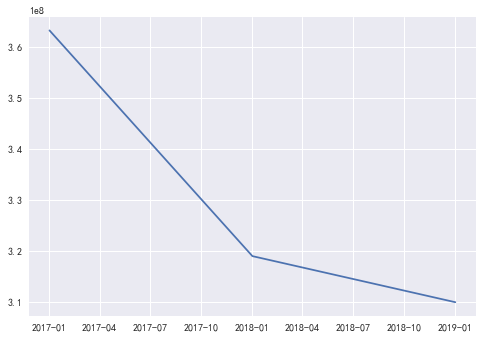

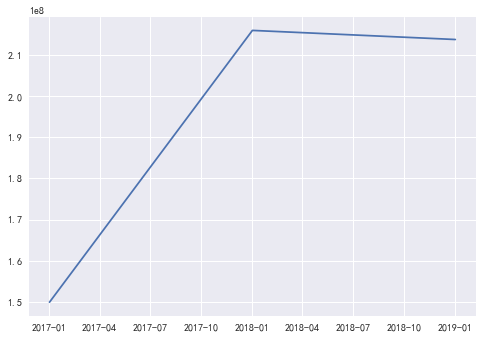

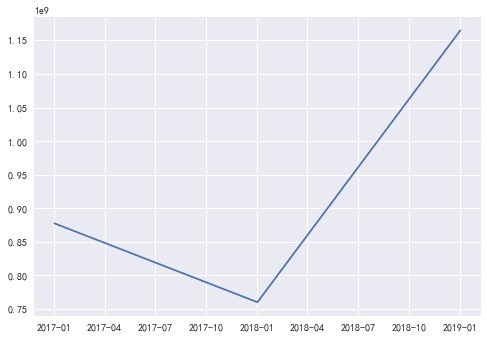

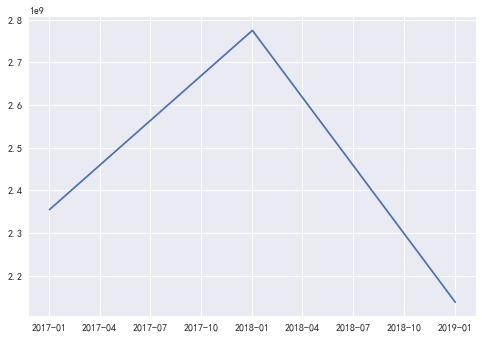

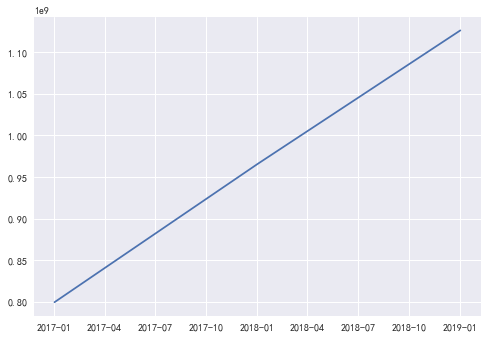

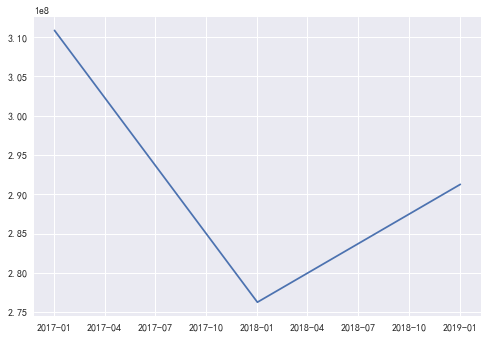

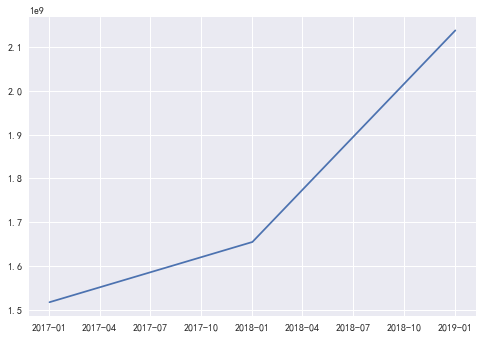

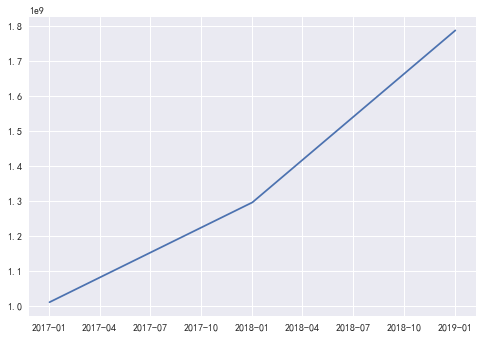

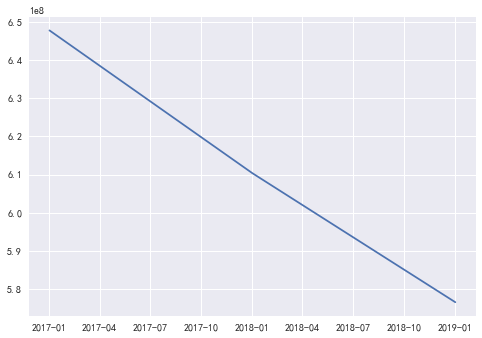

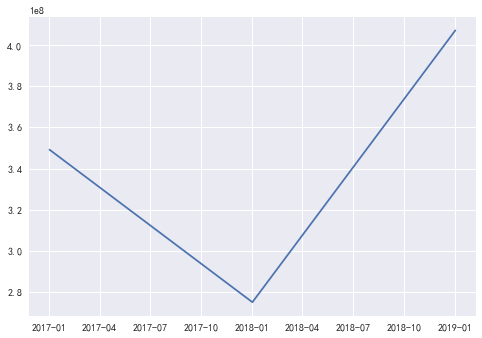

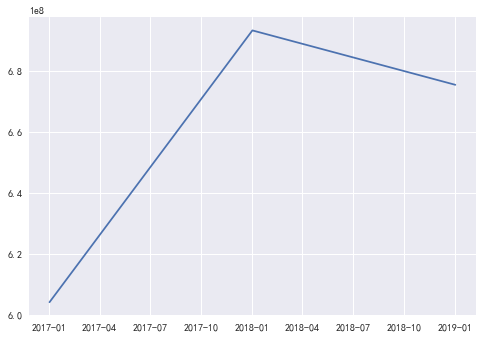

In [24]:
incom2 = []
incom3 = []
前20家公司三年营业收入 = 公司三年营业收入[:-15]
for i in 前20家公司三年营业收入:
    x=i
    del x[0]
    for i in x:
        y = i.replace(',', '')    
        incom2.append(y)      
    print(incom2)
    incom3 = list(map(float, incom2))
    date = ['2019','2018','2017']
    date = pd.to_datetime(date)
    df = pd.DataFrame(incom3, index=date)
    fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
    ax.plot(df.index, df[0])                      
    incom2 = []

## 数据分析

从20张图中，可以看出半数公司在2017年到2019年的营业额，是一个逐年上涨的趋势。当然也有少数几家公司是逐渐下降的。并且在20家公司的营业收入折线图中，2018年是一个两级分化很严重的一年，有些公司2018年的营业收入是三年的高点，而有些则恰恰相反，是三年的低点。大部分公司都在2018年有一个很明显的拐点，部分是在2018年之后营业收入大增，部分是在2018年之后营业收入跌幅很大，还有少部分属于正常的波动。所以，可以猜测2018年有什么大型事件发生，这对不同行业造成了一个很显著的影响，使其在2018年前后的营业收入有一个反差。